In [1]:

%pylab inline
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal
import datetime
import seaborn as sns
from math import sqrt
from itertools import *
import os
import re
from IPython.display import HTML, display

Populating the interactive namespace from numpy and matplotlib


## DATA UNDERSTANDING

In [2]:
#Reading the Data from CSV using panda
#staffRec = pd.read_csv('NRCData.csv')

In [3]:
import pyodbc 
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=localhost;"
                      "Database=NRCHRM;"
                      "Trusted_Connection=yes;")



query = 'SELECT * FROM HRP_vw_EmployeeInfo'
df = pd.read_sql(query, con = cnxn)


# Put it all to a data frame

#df = pd.read_sql(query, con = mydb)


#df = pd.DataFrame(cursor.fetchall())
#df.columns = cursor.column_names




#for row in cursor:
#    print('row = %r' % (row,))

In [4]:
df.head()

,DepartmentCode,DepartmentName,StateName,LGAName,StaffID,StaffRefNo,Sex,DateOfBirth,DateEmployed,QualificationID,...,QualificationID2,QualificationID3,QualificationID4,ProfessionalQualification2,ProfessionalQualification3,ProfessionalQualification4,MaidenName,ZoneID,ZoneName,ZoneCode
0,CEN,Civil Engineering / New Lines,Abia,Arochukwu,302,NRC1338367,Male,1960-12-31,1981-03-02,12.0,...,10.0,12.0,0.0,,,,,5,South-East,SE
1,CEN,Civil Engineering / New Lines,Abia,Arochukwu,6523,NRC2392825,0,1976-06-06,2012-09-03,0.0,...,0.0,0.0,0.0,,,,,5,South-East,SE
2,CEN,Civil Engineering / New Lines,Abia,Arochukwu,6481,NRC2398502,Male,1985-10-16,2012-07-18,10.0,...,0.0,0.0,0.0,,,,,5,South-East,SE
3,CEN,Civil Engineering / New Lines,Abia,Arochukwu,5719,NRC8349173,0,1969-01-04,1992-04-16,0.0,...,0.0,0.0,0.0,,,,,5,South-East,SE
4,CEN,Civil Engineering / New Lines,Abia,Arochukwu,5748,NRC8359249,Male,1953-12-10,1979-05-03,0.0,...,0.0,0.0,0.0,,,,,5,South-East,SE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9087 entries, 0 to 9086
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DepartmentCode              9087 non-null   object        
 1   DepartmentName              9087 non-null   object        
 2   StateName                   9087 non-null   object        
 3   LGAName                     9087 non-null   object        
 4   StaffID                     9087 non-null   int64         
 5   StaffRefNo                  9087 non-null   object        
 6   Sex                         7030 non-null   object        
 7   DateOfBirth                 7030 non-null   datetime64[ns]
 8   DateEmployed                7030 non-null   datetime64[ns]
 9   QualificationID             7030 non-null   float64       
 10  Districts                   9087 non-null   object        
 11  DepartmentID                9087 non-null   int64       

In [40]:
(df.isnull().sum()[df.isnull().sum().nonzero()[0]])/len(df)

AttributeError: 'Series' object has no attribute 'nonzero'

In [6]:

# The function will be used to plot seaborn data.
def Display_graph(columns, data):
    plt.figure(figsize=(20,20))
    plt.xticks(rotation=90)
    sns.countplot((data)[(columns)],
                 order = data[columns].value_counts().index)
    print(data[columns].value_counts())
    plt.show()

In [7]:
# checking
(df.DepartmentCode.value_counts())/(df.DepartmentCode.count())

CEN    0.383405
OC     0.246726
MST    0.222516
HR     0.095081
FIN    0.029052
CP     0.023220
Name: DepartmentCode, dtype: float64

Civil Engineering / New Lines       3484
Operations & Commercial             2242
Mechanical / S&T                    2022
Administration/HR                    864
Finance                              264
Corporate Planning / Procurement     211
Name: DepartmentName, dtype: int64


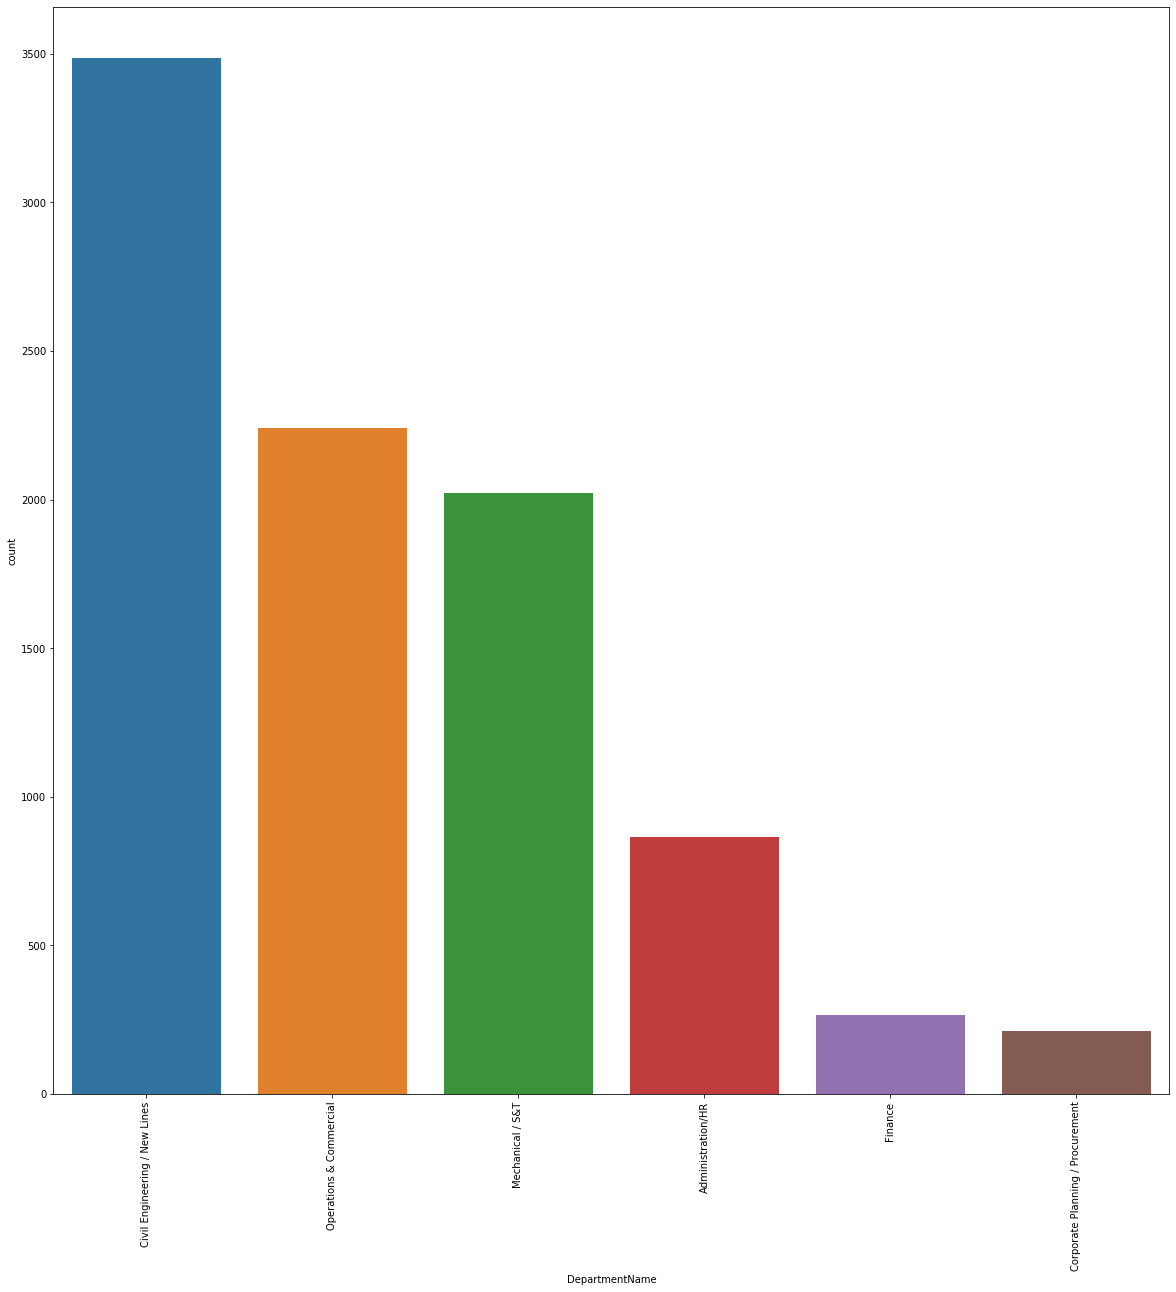

In [8]:
Display_graph('DepartmentName', df)

Northern          1810
Lagos             1185
North Central     1057
Headquarters      1056
Western           1038
Eastern            901
North Eastern      825
Northern West      711
Liaison Office     504
Name: Districts, dtype: int64


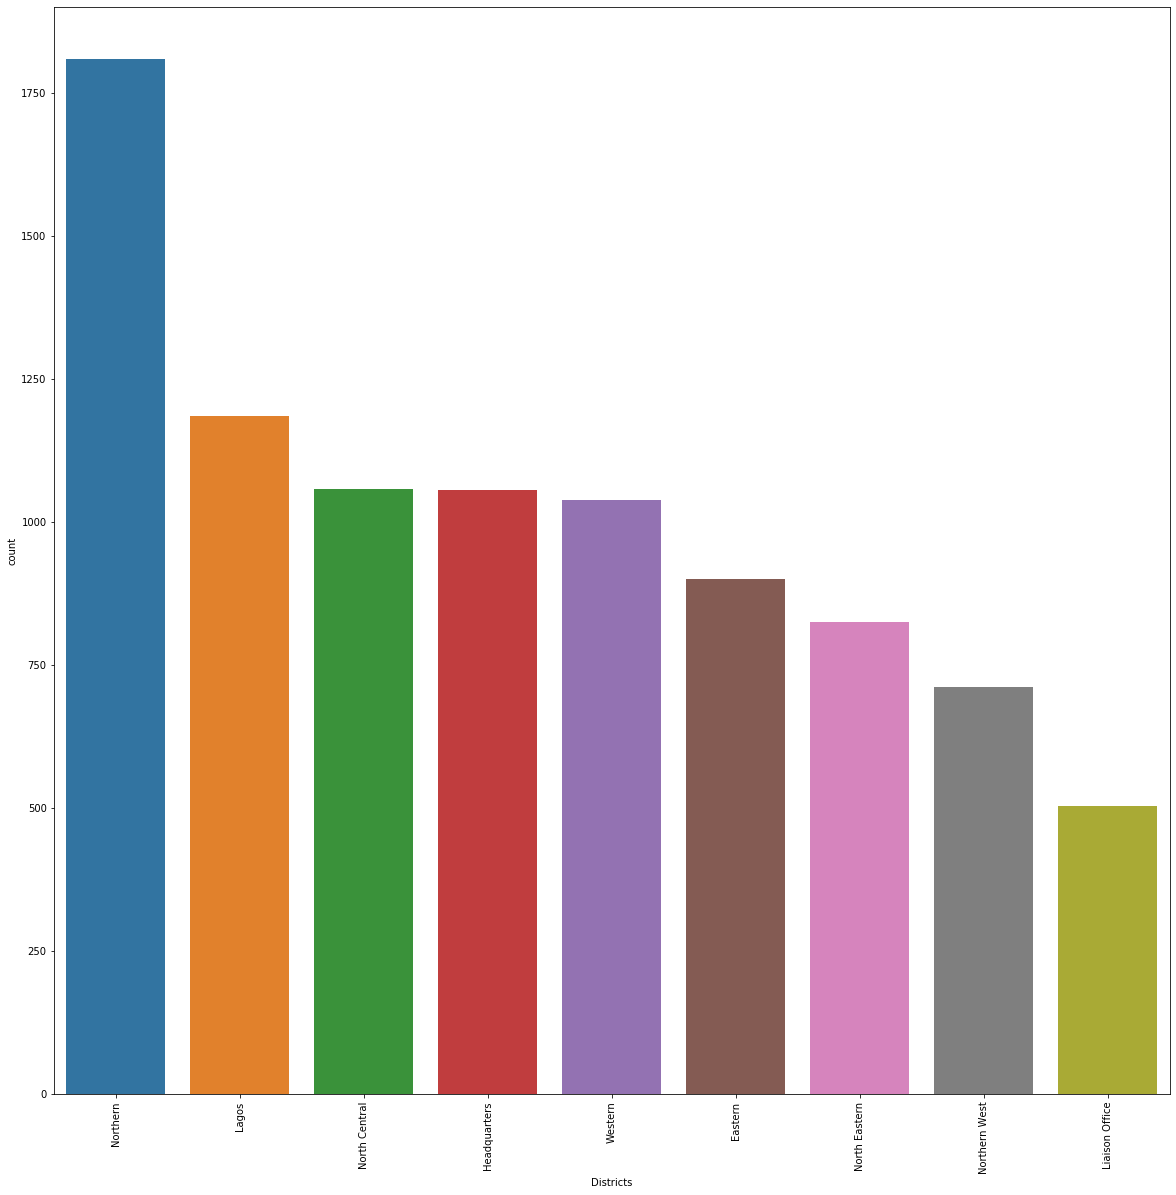

In [9]:
Display_graph('Districts', df)

Kaduna         1145
Benue           606
Ogun            540
Kogi            452
Enugu           433
Osun            404
Imo             377
Niger           345
Kwara           332
Oyo             314
Zamfara         293
Bauchi          291
Abia            282
Plateau         241
Edo             237
Kano            225
Katsina         219
Jigawa          184
Ondo            182
Delta           174
Akwa Ibom       168
Ekiti           168
Lagos           163
Anambra         154
Rivers          149
Gombe           149
Nassarawa       133
Cross River     124
Borno           112
Kebbi            97
Ebonyi           94
Adamawa          84
Yobe             65
Sokoto           52
FCT Abuja        51
Taraba           38
Bayelsa          10
Name: StateName, dtype: int64


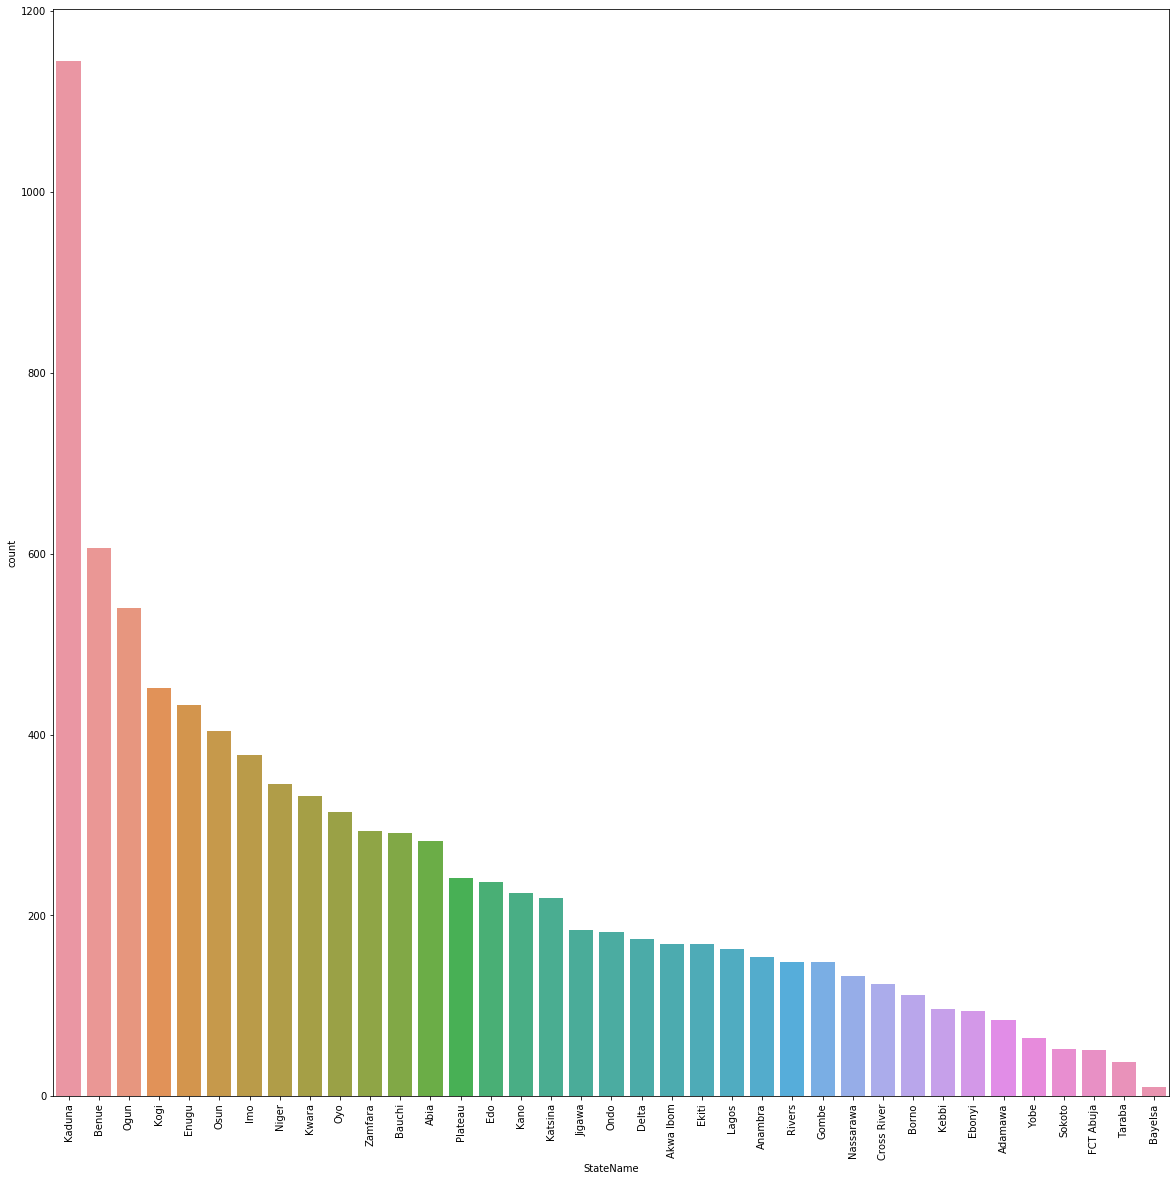

In [10]:
Display_graph('StateName', df)

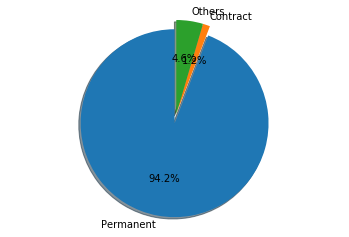

In [75]:
# Display_graph('Category', df) 


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels1 = 'Permanent','Contract','Others'
sizes1 = [8558, 113, 416]
explode1 = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()




North-West       2215
North-Central    2160
South-West       1771
South-East       1340
South-South       862
North-East        739
Name: ZoneName, dtype: int64


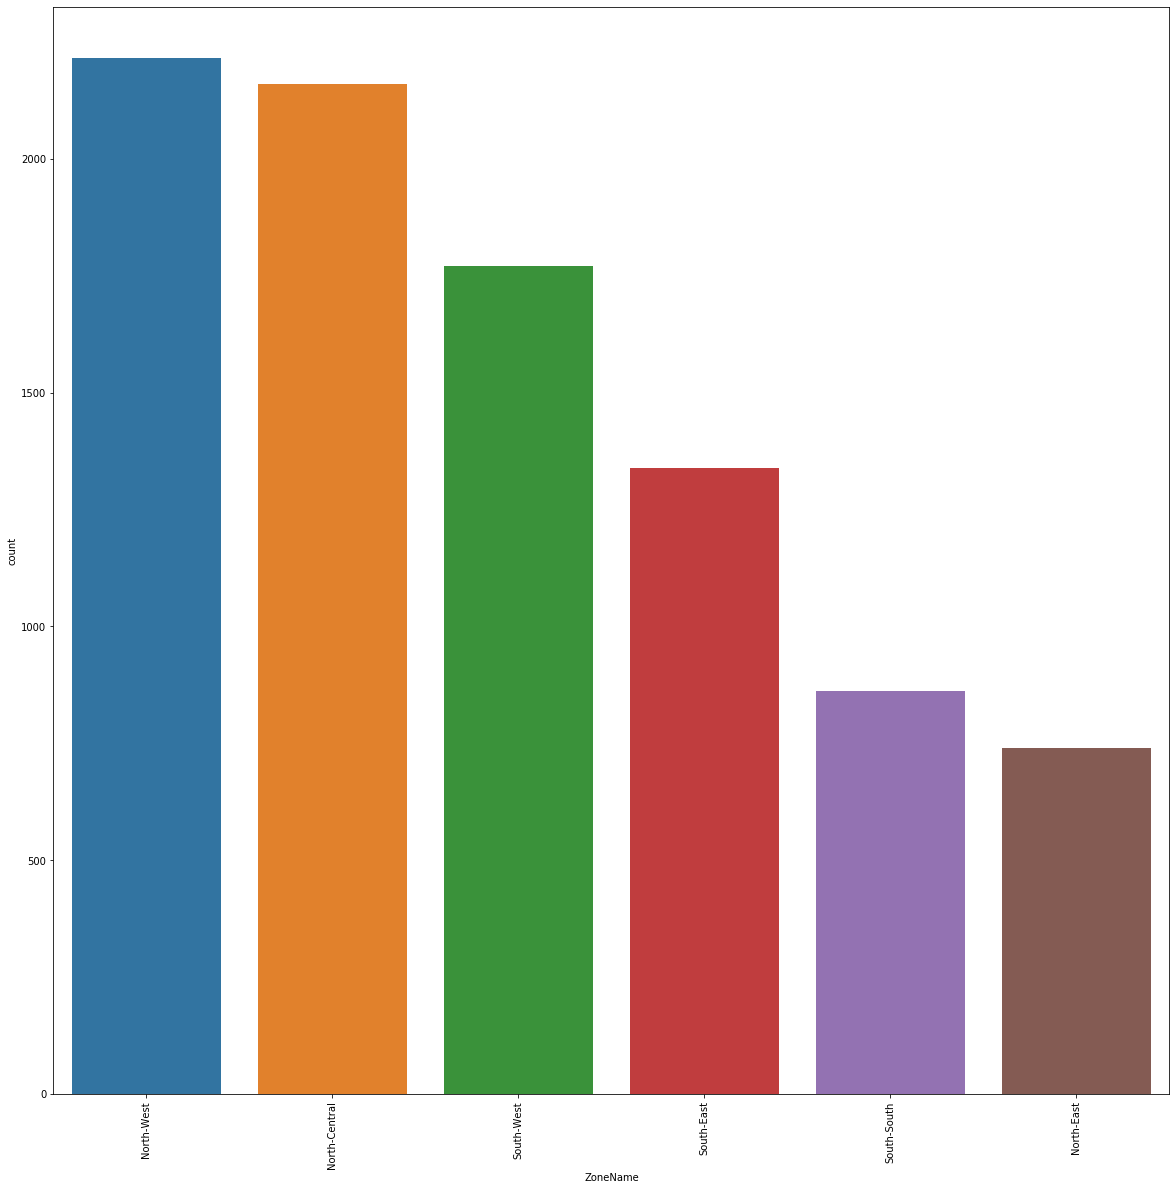

In [11]:
Display_graph('ZoneName', df) 




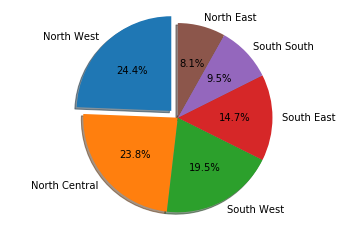

In [74]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'North West','North Central','South West','South East','South South','North East'
sizes = [2215, 2160, 1771, 1340, 862, 739]
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



                             4804
EBJ                           758
N/W                           349
LAGOS                         328
HEAD QUARTER                  101
                             ... 
NCD                             1
n/w                             1
N/E                             1
LAGOS                           1
minna                           1
Name: Location, Length: 91, dtype: int64


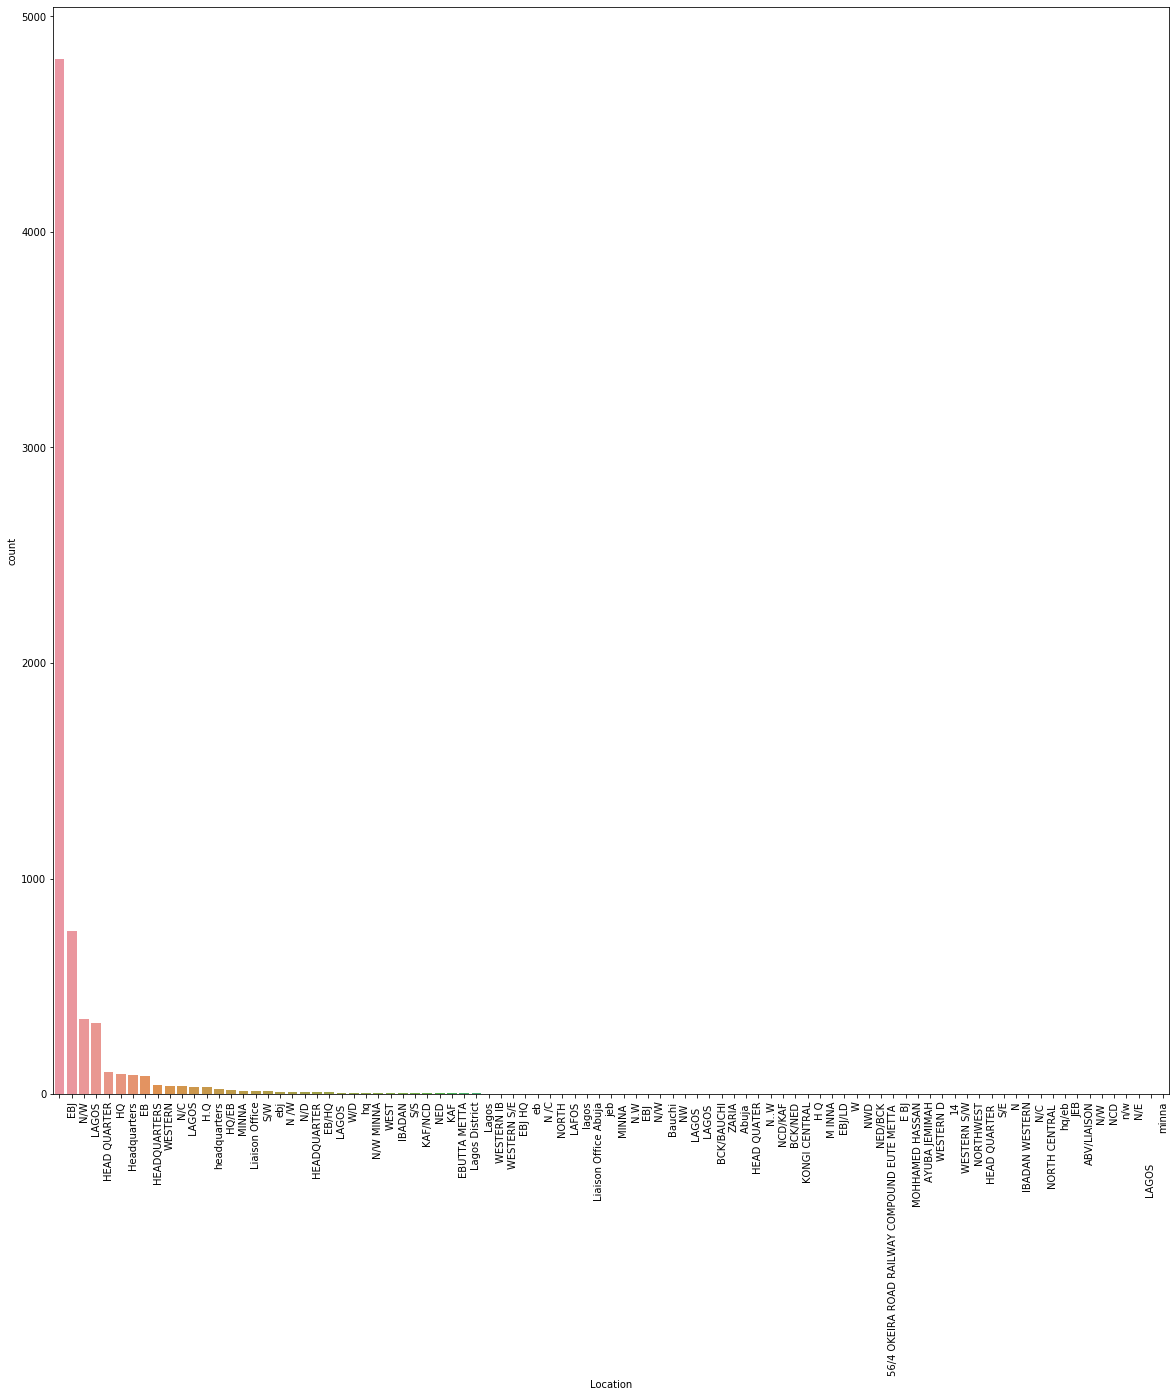

In [42]:
Display_graph('Location', df)                     

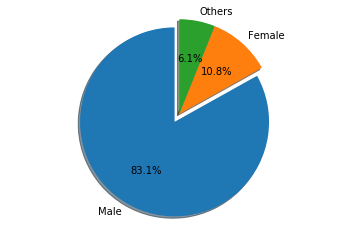

In [76]:
#Display_graph('Sex', df)        


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels2 = 'Male','Female','Others'
sizes2 = [5842, 759, 429]
explode2 = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Permanent    8558
0             414
Contract      113
Select          2
Name: Category, dtype: int64


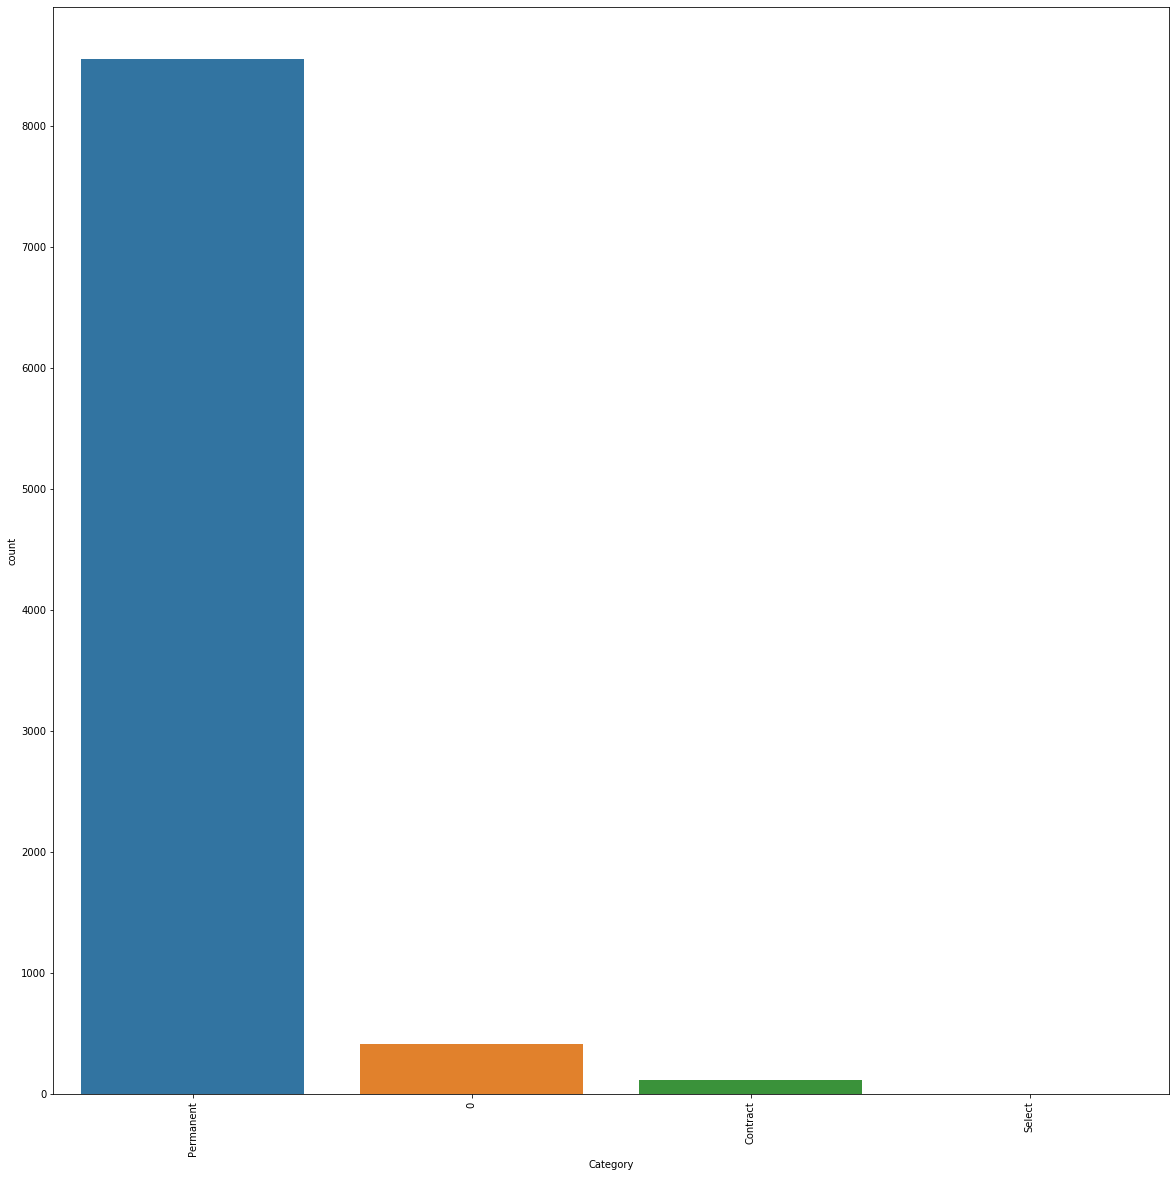

In [13]:
Display_graph('Category', df)

0.0     4000
4.0      722
5.0      530
6.0      456
8.0      324
7.0      303
9.0      229
10.0     140
12.0      86
13.0      82
14.0      53
3.0       49
15.0      25
16.0      13
2.0        5
11.0       4
1.0        4
17.0       4
19.0       1
Name: GradeLevel, dtype: int64


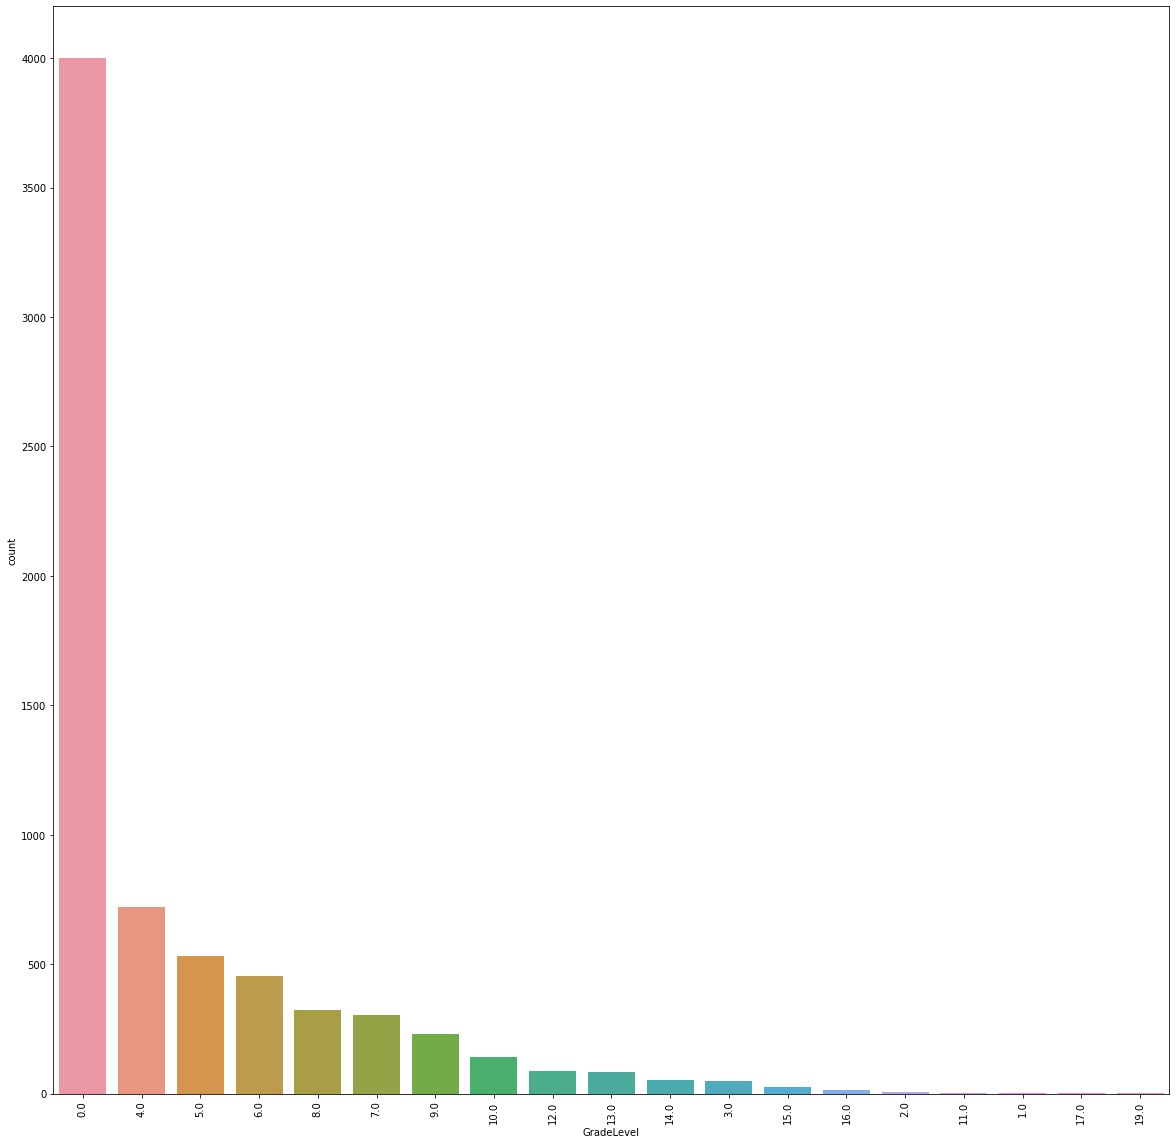

In [14]:
Display_graph('GradeLevel', df) 

Married      5613
Single        874
0             495
Widowed        27
Divorced       20
Seperated       1
Name: MaritalStatus, dtype: int64


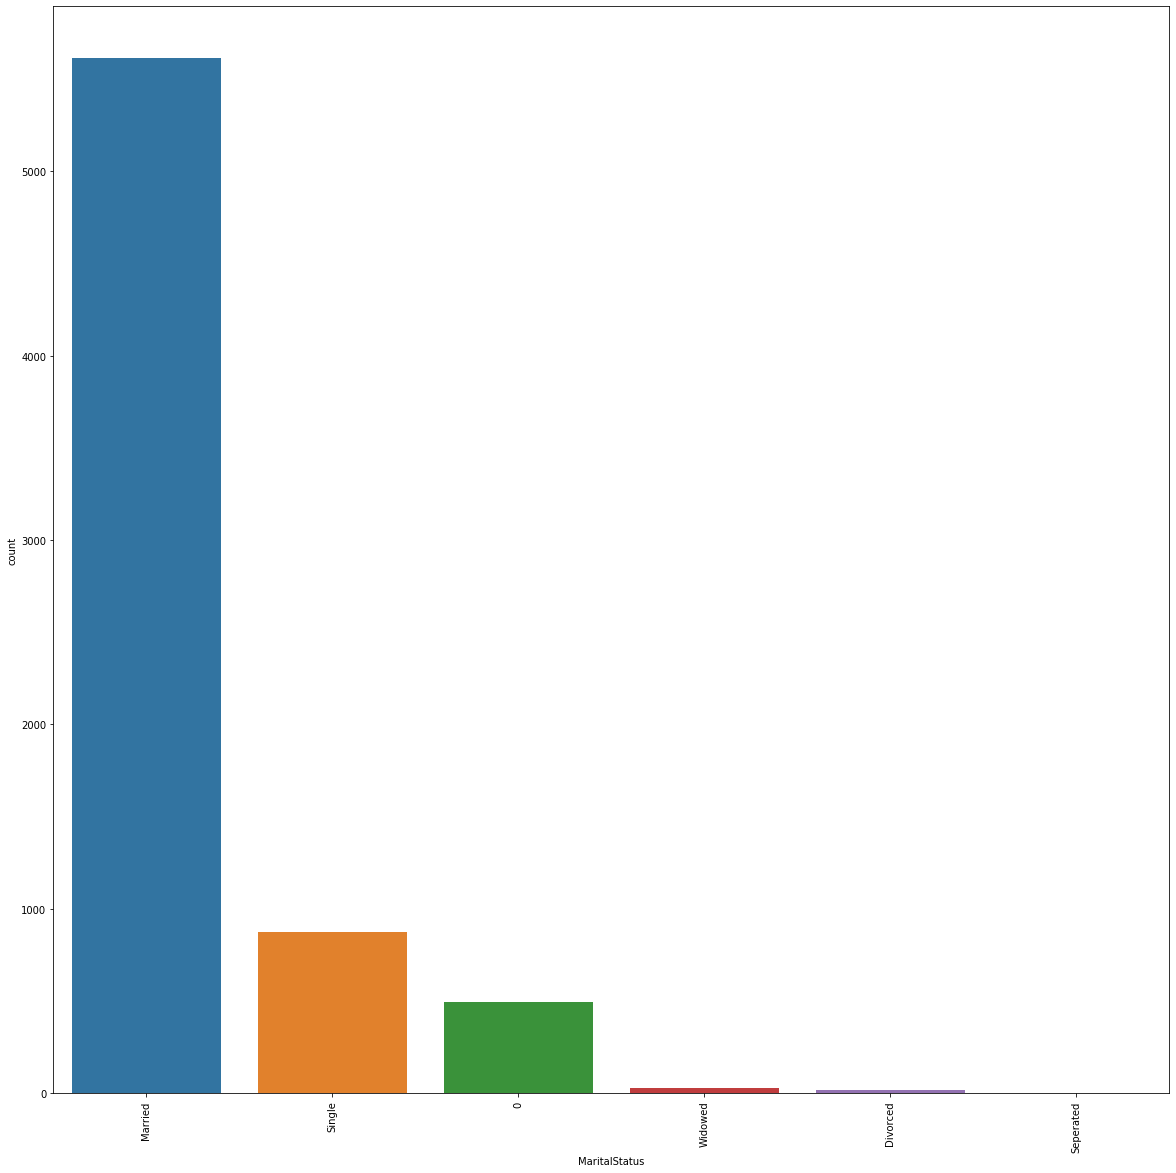

In [15]:
Display_graph('MaritalStatus', df) 

In [16]:
df.DateEmployed.describe()

count                    7030
unique                   1929
top       2013-10-21 00:00:00
freq                      392
first     1957-09-04 00:00:00
last      2014-10-21 00:00:00
Name: DateEmployed, dtype: object

In [17]:

df.DateOfBirth.describe()

count                    7030
unique                   4822
top       1972-12-31 00:00:00
freq                       27
first     1756-07-02 00:00:00
last      2013-03-17 00:00:00
Name: DateOfBirth, dtype: object

In [18]:
# extracting new columns
data_list = ['DepartmentName', 
                      'StateName', 
                      'LGAName', 
                      'Sex', 
                      'DateOfBirth', 
                      'DateEmployed', 
                      'Districts',
                      'Location',
                      'MaritalStatus', 
                      'StateOfOrigin', 
                      'ZoneName', 
                      'GradeLevel', 
                      'Category', 
                      'Step']


            

In [19]:
from datetime import date
today = datetime.date.today()
d0 = date(2017, 8, 18)
d1 = date(2017, 10, 26)
delta = d1 - d0
newDate = today - d0


time_difference = relativedelta(today, d0)
print(time_difference)
difference_in_years = time_difference.years

print(delta.days)
print(difference_in_years)

relativedelta(years=+3, months=+4, days=+3)
69
3


In [20]:
dfTest = df
#dfTest = df[[data_list]
            
default_list = dfTest[data_list]
new_list = default_list.dropna(axis = 0, how = 'any')
new_list

,DepartmentName,StateName,LGAName,Sex,DateOfBirth,DateEmployed,Districts,Location,MaritalStatus,StateOfOrigin,ZoneName,GradeLevel,Category,Step
0,Civil Engineering / New Lines,Abia,Arochukwu,Male,1960-12-31,1981-03-02,Headquarters,LAGOS,Married,1,South-East,12.0,Permanent,6.0
1,Civil Engineering / New Lines,Abia,Arochukwu,0,1976-06-06,2012-09-03,Lagos,,0,1,South-East,0.0,0,0.0
2,Civil Engineering / New Lines,Abia,Arochukwu,Male,1985-10-16,2012-07-18,Lagos,ebj,Single,1,South-East,0.0,Permanent,0.0
3,Civil Engineering / New Lines,Abia,Arochukwu,0,1969-01-04,1992-04-16,Eastern,,Married,1,South-East,0.0,Permanent,0.0
4,Civil Engineering / New Lines,Abia,Arochukwu,Male,1953-12-10,1979-05-03,Eastern,,Married,1,South-East,0.0,Permanent,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9022,Operations & Commercial,Yobe,Potiskum,Male,1983-08-21,2010-08-02,North Eastern,,0,36,North-East,6.0,Permanent,2.0
9023,Operations & Commercial,Yobe,Potiskum,Male,1985-01-11,2010-08-02,North Eastern,,Single,36,North-East,0.0,Permanent,0.0
9031,Operations & Commercial,Zamfara,Bungudu,Male,1976-05-10,1998-08-17,Northern,,Married,37,North-West,6.0,Permanent,9.0
9032,Operations & Commercial,Zamfara,Bungudu,Male,1977-12-20,1998-08-17,Northern,,Married,37,North-West,0.0,Permanent,0.0


In [21]:
new_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7029 entries, 0 to 9037
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DepartmentName  7029 non-null   object        
 1   StateName       7029 non-null   object        
 2   LGAName         7029 non-null   object        
 3   Sex             7029 non-null   object        
 4   DateOfBirth     7029 non-null   datetime64[ns]
 5   DateEmployed    7029 non-null   datetime64[ns]
 6   Districts       7029 non-null   object        
 7   Location        7029 non-null   object        
 8   MaritalStatus   7029 non-null   object        
 9   StateOfOrigin   7029 non-null   int64         
 10  ZoneName        7029 non-null   object        
 11  GradeLevel      7029 non-null   float64       
 12  Category        7029 non-null   object        
 13  Step            7029 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(9)
me

In [22]:
new_list['Age'] = pd.to_datetime('today').year - df['DateOfBirth'].dt.year


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
new_list['YearsInService'] = pd.to_datetime('today').year - new_list['DateEmployed'].dt.year
new_list

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DepartmentName,StateName,LGAName,Sex,DateOfBirth,DateEmployed,Districts,Location,MaritalStatus,StateOfOrigin,ZoneName,GradeLevel,Category,Step,Age,YearsInService
0,Civil Engineering / New Lines,Abia,Arochukwu,Male,1960-12-31,1981-03-02,Headquarters,LAGOS,Married,1,South-East,12.0,Permanent,6.0,60.0,39
1,Civil Engineering / New Lines,Abia,Arochukwu,0,1976-06-06,2012-09-03,Lagos,,0,1,South-East,0.0,0,0.0,44.0,8
2,Civil Engineering / New Lines,Abia,Arochukwu,Male,1985-10-16,2012-07-18,Lagos,ebj,Single,1,South-East,0.0,Permanent,0.0,35.0,8
3,Civil Engineering / New Lines,Abia,Arochukwu,0,1969-01-04,1992-04-16,Eastern,,Married,1,South-East,0.0,Permanent,0.0,51.0,28
4,Civil Engineering / New Lines,Abia,Arochukwu,Male,1953-12-10,1979-05-03,Eastern,,Married,1,South-East,0.0,Permanent,0.0,67.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9022,Operations & Commercial,Yobe,Potiskum,Male,1983-08-21,2010-08-02,North Eastern,,0,36,North-East,6.0,Permanent,2.0,37.0,10
9023,Operations & Commercial,Yobe,Potiskum,Male,1985-01-11,2010-08-02,North Eastern,,Single,36,North-East,0.0,Permanent,0.0,35.0,10
9031,Operations & Commercial,Zamfara,Bungudu,Male,1976-05-10,1998-08-17,Northern,,Married,37,North-West,6.0,Permanent,9.0,44.0,22
9032,Operations & Commercial,Zamfara,Bungudu,Male,1977-12-20,1998-08-17,Northern,,Married,37,North-West,0.0,Permanent,0.0,43.0,22


In [24]:
max_age = 65
max_year_of_service = 35

cur_age = 37
cur_year_in_service = 10

years_remaining_age = 0
years_remaining_service = 0
years_remaining = 0

if cur_age <= max_age:
    years_remaining_age = max_age - cur_age
    
    

if cur_year_in_service <= max_year_of_service:
    years_remaining_service = max_year_of_service - cur_year_in_service

if years_remaining_service > years_remaining_age:
    years_remaining = years_remaining_age
else:
    years_remaining = years_remaining_service
    

years_remaining_age
years_remaining_service
years_remaining





25

In [25]:
from collections import defaultdict
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

 

In [26]:
new_list

,DepartmentName,StateName,LGAName,Sex,DateOfBirth,DateEmployed,Districts,Location,MaritalStatus,StateOfOrigin,ZoneName,GradeLevel,Category,Step,Age,YearsInService
0,Civil Engineering / New Lines,Abia,Arochukwu,Male,1960-12-31,1981-03-02,Headquarters,LAGOS,Married,1,South-East,12.0,Permanent,6.0,60.0,39
1,Civil Engineering / New Lines,Abia,Arochukwu,0,1976-06-06,2012-09-03,Lagos,,0,1,South-East,0.0,0,0.0,44.0,8
2,Civil Engineering / New Lines,Abia,Arochukwu,Male,1985-10-16,2012-07-18,Lagos,ebj,Single,1,South-East,0.0,Permanent,0.0,35.0,8
3,Civil Engineering / New Lines,Abia,Arochukwu,0,1969-01-04,1992-04-16,Eastern,,Married,1,South-East,0.0,Permanent,0.0,51.0,28
4,Civil Engineering / New Lines,Abia,Arochukwu,Male,1953-12-10,1979-05-03,Eastern,,Married,1,South-East,0.0,Permanent,0.0,67.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9022,Operations & Commercial,Yobe,Potiskum,Male,1983-08-21,2010-08-02,North Eastern,,0,36,North-East,6.0,Permanent,2.0,37.0,10
9023,Operations & Commercial,Yobe,Potiskum,Male,1985-01-11,2010-08-02,North Eastern,,Single,36,North-East,0.0,Permanent,0.0,35.0,10
9031,Operations & Commercial,Zamfara,Bungudu,Male,1976-05-10,1998-08-17,Northern,,Married,37,North-West,6.0,Permanent,9.0,44.0,22
9032,Operations & Commercial,Zamfara,Bungudu,Male,1977-12-20,1998-08-17,Northern,,Married,37,North-West,0.0,Permanent,0.0,43.0,22


In [27]:

years_remaining_in_service = []
testDf = new_list
test = new_list
cols = testDf.keys()
new_list

# testDf.loc[:, cols[14]:cols[-2]]
# #testDf.loc[1:, cols[15]:cols[-1]]
# max_age = 65
# max_year_of_service = 35
    
# cur_age = testDf.loc[:, cols[14]:cols[-2]] 
# cur_year_in_service = testDf.loc[:, cols[15]:cols[-1]] 

# years_remaining_age = 0
# years_remaining_service = 0
# years_remaining = 0


# cur_age
# cur_year_in_service


# if cur_age <= max_age:
#     years_remaining_age = max_age - cur_age



# if cur_year_in_service <= max_year_of_service:
#     years_remaining_service = max_year_of_service - cur_year_in_service

# if years_remaining_service > years_remaining_age:
#     years_remaining = years_remaining_age
# else:
#     years_remaining = years_remaining_service

# years_remaining_in_service.append(years_remaining)


# years_remaining_in_service

,DepartmentName,StateName,LGAName,Sex,DateOfBirth,DateEmployed,Districts,Location,MaritalStatus,StateOfOrigin,ZoneName,GradeLevel,Category,Step,Age,YearsInService
0,Civil Engineering / New Lines,Abia,Arochukwu,Male,1960-12-31,1981-03-02,Headquarters,LAGOS,Married,1,South-East,12.0,Permanent,6.0,60.0,39
1,Civil Engineering / New Lines,Abia,Arochukwu,0,1976-06-06,2012-09-03,Lagos,,0,1,South-East,0.0,0,0.0,44.0,8
2,Civil Engineering / New Lines,Abia,Arochukwu,Male,1985-10-16,2012-07-18,Lagos,ebj,Single,1,South-East,0.0,Permanent,0.0,35.0,8
3,Civil Engineering / New Lines,Abia,Arochukwu,0,1969-01-04,1992-04-16,Eastern,,Married,1,South-East,0.0,Permanent,0.0,51.0,28
4,Civil Engineering / New Lines,Abia,Arochukwu,Male,1953-12-10,1979-05-03,Eastern,,Married,1,South-East,0.0,Permanent,0.0,67.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9022,Operations & Commercial,Yobe,Potiskum,Male,1983-08-21,2010-08-02,North Eastern,,0,36,North-East,6.0,Permanent,2.0,37.0,10
9023,Operations & Commercial,Yobe,Potiskum,Male,1985-01-11,2010-08-02,North Eastern,,Single,36,North-East,0.0,Permanent,0.0,35.0,10
9031,Operations & Commercial,Zamfara,Bungudu,Male,1976-05-10,1998-08-17,Northern,,Married,37,North-West,6.0,Permanent,9.0,44.0,22
9032,Operations & Commercial,Zamfara,Bungudu,Male,1977-12-20,1998-08-17,Northern,,Married,37,North-West,0.0,Permanent,0.0,43.0,22


In [28]:

# years_remaining_in_service = []
# testDf = new_list
# cols = testDf.keys()


def years_remaining_in_service(data):    
    max_age = 65
    max_year_of_service = 35
    
    data['Years_Remaining'] = 0 # or np.nan or whatever

#     for index,row in df2.iterrows():
#           value = Geohash.encode(row['Latitude'],row['Longitude'], precision=8)
#           df2.set_value(index,'Geohash',value)
    
    
    
    for index,row in data.iterrows():
        cur_age =  row['Age']
        cur_year_in_service = row['YearsInService']

        years_remaining_age = 0
        years_remaining_service = 0
        years_remaining = 0

        if cur_age <= max_age:
            years_remaining_age = max_age - cur_age



        if cur_year_in_service <= max_year_of_service:
            years_remaining_service = max_year_of_service - cur_year_in_service

        if years_remaining_service > years_remaining_age:
            years_remaining = years_remaining_age
        else:
            years_remaining = years_remaining_service
        
        data.at[index, 'Years_Remaining'] = years_remaining
#         print(years_remaining)
#         data.set_value(index,'Years_Remaining',years_remaining)
#         data.[17:'Years_Remaining'] = years_remaining
        #years_remaining_in_service.append(years_remaining)
        
years_remaining_in_service(test)
test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,DepartmentName,StateName,LGAName,Sex,DateOfBirth,DateEmployed,Districts,Location,MaritalStatus,StateOfOrigin,ZoneName,GradeLevel,Category,Step,Age,YearsInService,Years_Remaining
0,Civil Engineering / New Lines,Abia,Arochukwu,Male,1960-12-31,1981-03-02,Headquarters,LAGOS,Married,1,South-East,12.0,Permanent,6.0,60.0,39,0
1,Civil Engineering / New Lines,Abia,Arochukwu,0,1976-06-06,2012-09-03,Lagos,,0,1,South-East,0.0,0,0.0,44.0,8,21
2,Civil Engineering / New Lines,Abia,Arochukwu,Male,1985-10-16,2012-07-18,Lagos,ebj,Single,1,South-East,0.0,Permanent,0.0,35.0,8,27
3,Civil Engineering / New Lines,Abia,Arochukwu,0,1969-01-04,1992-04-16,Eastern,,Married,1,South-East,0.0,Permanent,0.0,51.0,28,7
4,Civil Engineering / New Lines,Abia,Arochukwu,Male,1953-12-10,1979-05-03,Eastern,,Married,1,South-East,0.0,Permanent,0.0,67.0,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9022,Operations & Commercial,Yobe,Potiskum,Male,1983-08-21,2010-08-02,North Eastern,,0,36,North-East,6.0,Permanent,2.0,37.0,10,25
9023,Operations & Commercial,Yobe,Potiskum,Male,1985-01-11,2010-08-02,North Eastern,,Single,36,North-East,0.0,Permanent,0.0,35.0,10,25
9031,Operations & Commercial,Zamfara,Bungudu,Male,1976-05-10,1998-08-17,Northern,,Married,37,North-West,6.0,Permanent,9.0,44.0,22,13
9032,Operations & Commercial,Zamfara,Bungudu,Male,1977-12-20,1998-08-17,Northern,,Married,37,North-West,0.0,Permanent,0.0,43.0,22,13


In [32]:
new_list['RetirementYear'] = new_list['Years_Remaining'] + 2020


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
dft = new_list.sort_values(by=['RetirementYear'],ascending=True)

In [53]:
dft

,DepartmentName,StateName,LGAName,Sex,DateOfBirth,DateEmployed,Districts,Location,MaritalStatus,StateOfOrigin,ZoneName,GradeLevel,Category,Step,Age,YearsInService,Years_Remaining,RetirementYear,Employement_Year
0,Civil Engineering / New Lines,Abia,Arochukwu,Male,1960-12-31,1981-03-02,Headquarters,LAGOS,Married,1,South-East,12.0,Permanent,6.0,60.0,39,0,2020,1981
4405,Administration/HR,Kaduna,Kauru,Female,1961-12-12,1983-03-01,Northern West,N/W,Married,19,North-West,7.0,Permanent,3.0,59.0,37,0,2020,1983
4406,Administration/HR,Kaduna,Kauru,Male,1956-12-03,1983-07-01,Northern,,Married,19,North-West,0.0,Permanent,0.0,64.0,37,0,2020,1983
4409,Administration/HR,Kaduna,Lere,Male,1959-07-15,1983-09-08,North Central,,Married,19,North-West,0.0,Permanent,0.0,61.0,37,0,2020,1983
4411,Administration/HR,Kaduna,Sabon Gari,Male,1959-10-13,1984-01-06,Headquarters,LAGOS,Married,19,North-West,12.0,Permanent,4.0,61.0,36,0,2020,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,Civil Engineering / New Lines,Kogi,Ankpa,Male,1986-06-02,2013-10-21,Lagos,EBJ,Single,23,North-Central,4.0,Permanent,1.0,34.0,7,28,2048,2013
4982,Mechanical / S&T,Anambra,Awka South,Male,1987-11-28,2013-10-21,Headquarters,EB,Single,4,South-East,4.0,Permanent,1.0,33.0,7,28,2048,2013
6221,Mechanical / S&T,Lagos,Ajeromi-Ifelodun,Male,1990-06-24,2013-10-21,Lagos,EBJ,Single,25,South-West,5.0,Permanent,1.0,30.0,7,28,2048,2013
4975,Mechanical / S&T,Anambra,Anambra East,Female,1985-01-13,2013-10-21,Headquarters,EB,Single,4,South-East,5.0,Permanent,1.0,35.0,7,28,2048,2013


2020    1610
2045     652
2033     507
2034     427
2032     399
2031     376
2048     335
2029     329
2035     307
2036     291
2025     279
2046     192
2030     164
2021     145
2027     126
2043     109
2047      98
2028      95
2022      88
2024      79
2026      74
2044      65
2023      62
2041      53
2042      41
2040      40
2037      37
2039      26
2038      23
Name: RetirementYear, dtype: int64


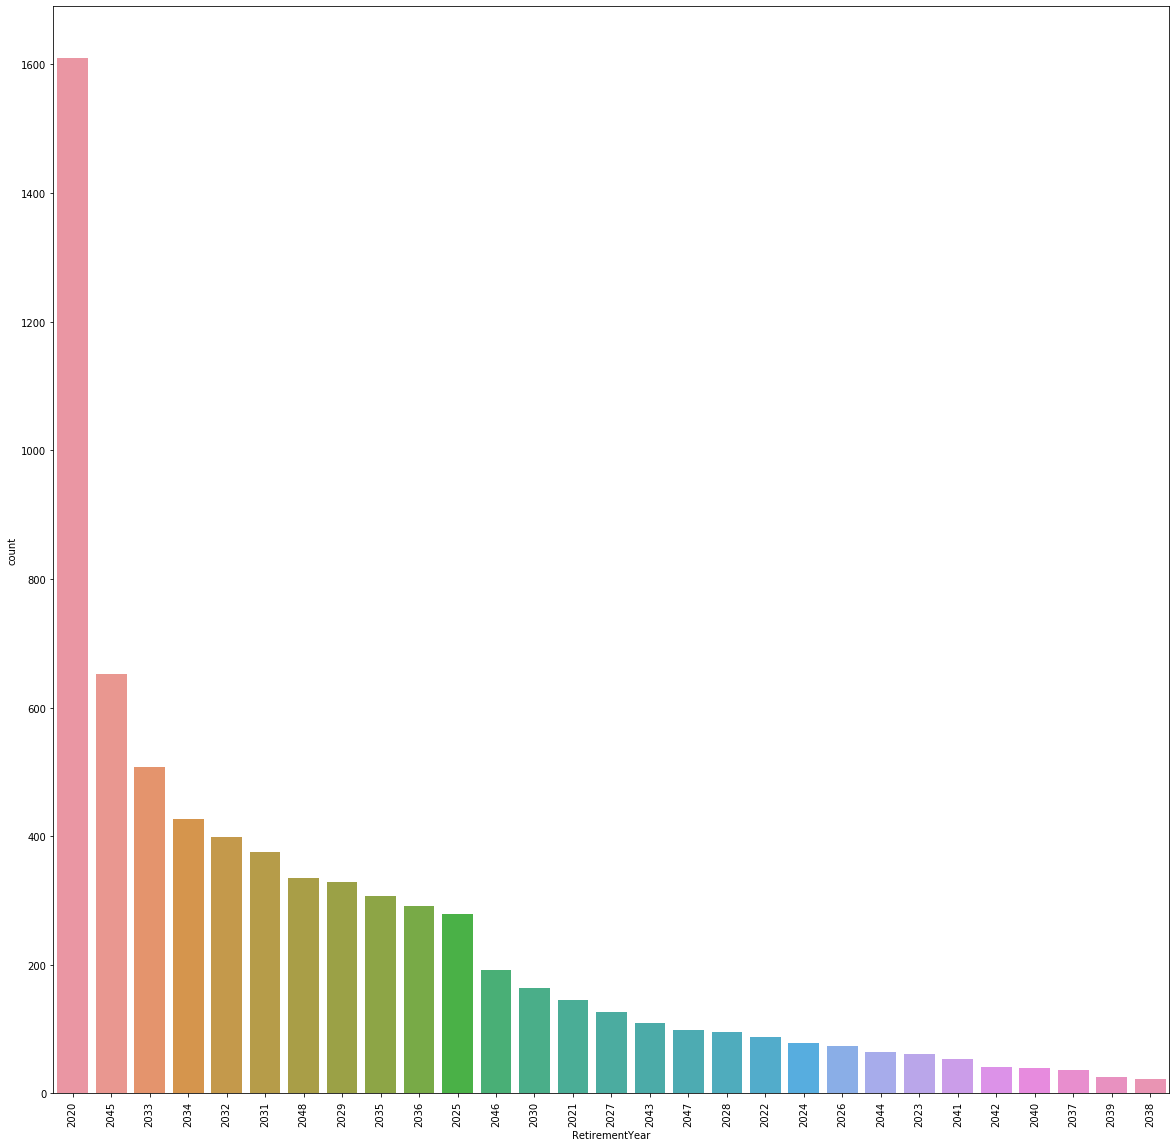

In [77]:
Display_graph('RetirementYear',dft) 

In [82]:


import seaborn as sns
def category_plot(x_data, y_data, data_list):
    plt.figure(figsize=(15, 8))
    sns.stripplot(x=x_data, y=y_data, data=data_list, size=5)

#category_plot('Employement_Year', 'RetirementYear', dft)
#sns.regplot(data=dft, x='Employement_Year', y='RetirementYear')

In [91]:
# The function will be used to plot seaborn data.

def Display_graph_r(columns, data):
    plt.figure(figsize=(20,20))
    plt.xticks(rotation=90)
    #sns.countplot((data)[(columns)],order = data[columns].value_counts().index)
    sns.countplot((data)[(columns)])
    


    print(data[columns].value_counts())
    plt.show()

2020    1610
2045     652
2033     507
2034     427
2032     399
2031     376
2048     335
2029     329
2035     307
2036     291
2025     279
2046     192
2030     164
2021     145
2027     126
2043     109
2047      98
2028      95
2022      88
2024      79
2026      74
2044      65
2023      62
2041      53
2042      41
2040      40
2037      37
2039      26
2038      23
Name: RetirementYear, dtype: int64


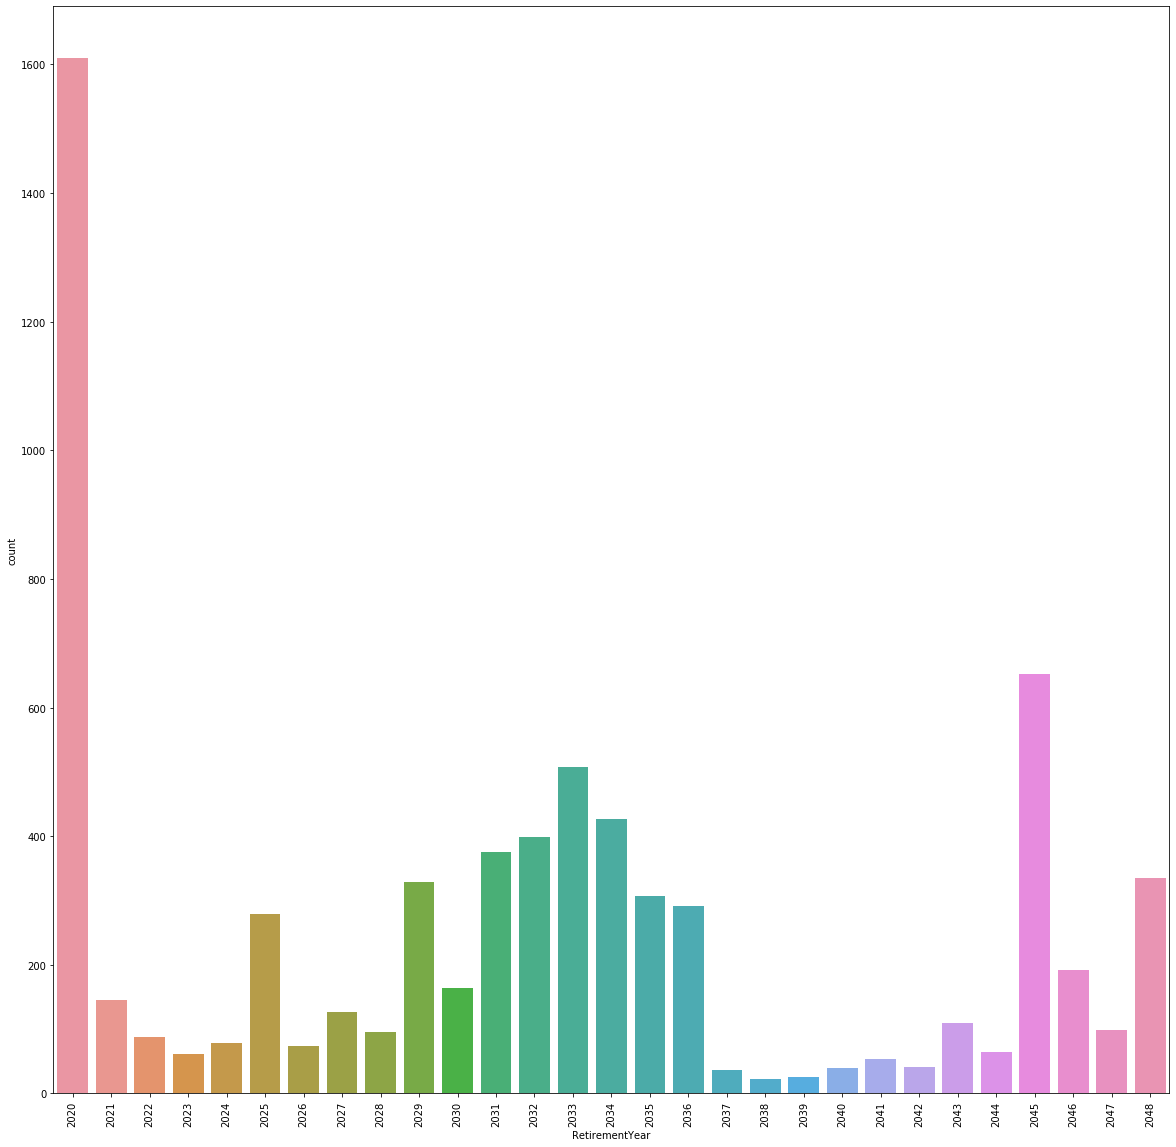

In [92]:
Display_graph_r('RetirementYear',dft) 

2020    1610
2045     652
2033     507
2034     427
2032     399
2031     376
2048     335
2029     329
2035     307
2036     291
2025     279
2046     192
2030     164
2021     145
2027     126
2043     109
2047      98
2028      95
2022      88
2024      79
2026      74
2044      65
2023      62
2041      53
2042      41
2040      40
2037      37
2039      26
2038      23
Name: RetirementYear, dtype: int64


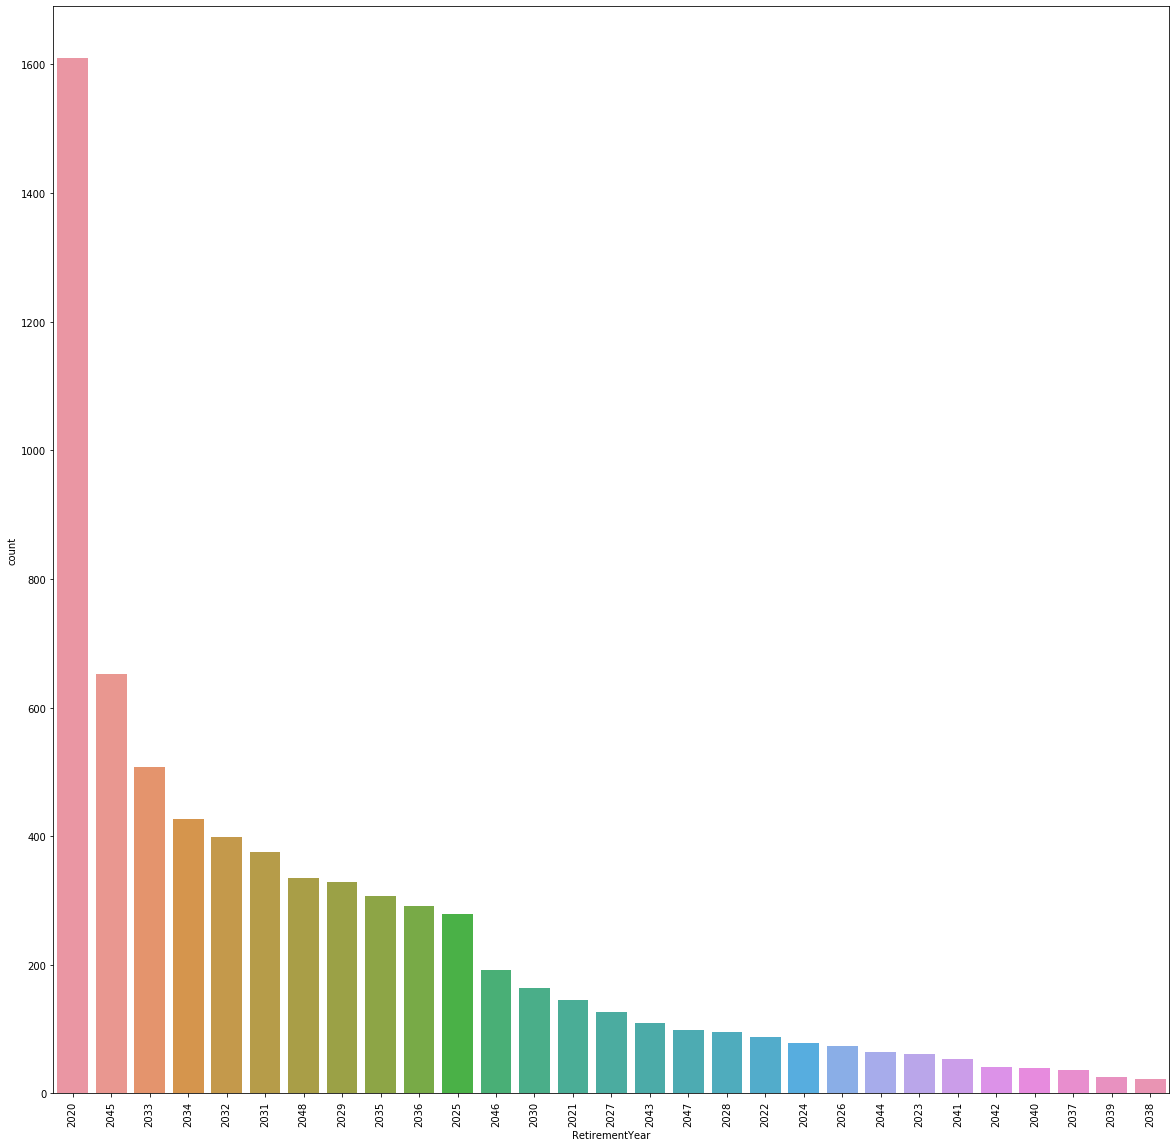

In [54]:
#Retirment graph
# retirementDf = new_list.sort_values(by=['RetirementYear'],ascending=True)
# retirementDf
Display_graph('RetirementYear',dft) 

In [38]:
#employement year count
new_list['Employement_Year'] = new_list['DateEmployed'].dt.year
new_list['Employement_Year'].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


7029

2010    740
1998    604
2013    589
1999    539
1997    479
2001    402
1996    395
2000    344
2011    323
1994    318
1980    296
1982    231
1981    227
1979    219
1990    209
1983    190
1978    135
1995    132
1986    120
1984     96
2012     90
1985     80
1977     55
1992     54
1987     42
2002     26
1988     20
2006     19
1991     11
1993      9
2003      6
1989      6
2014      5
2005      5
2008      3
2009      3
2007      2
1974      2
2004      1
1957      1
1975      1
Name: Employement_Year, dtype: int64


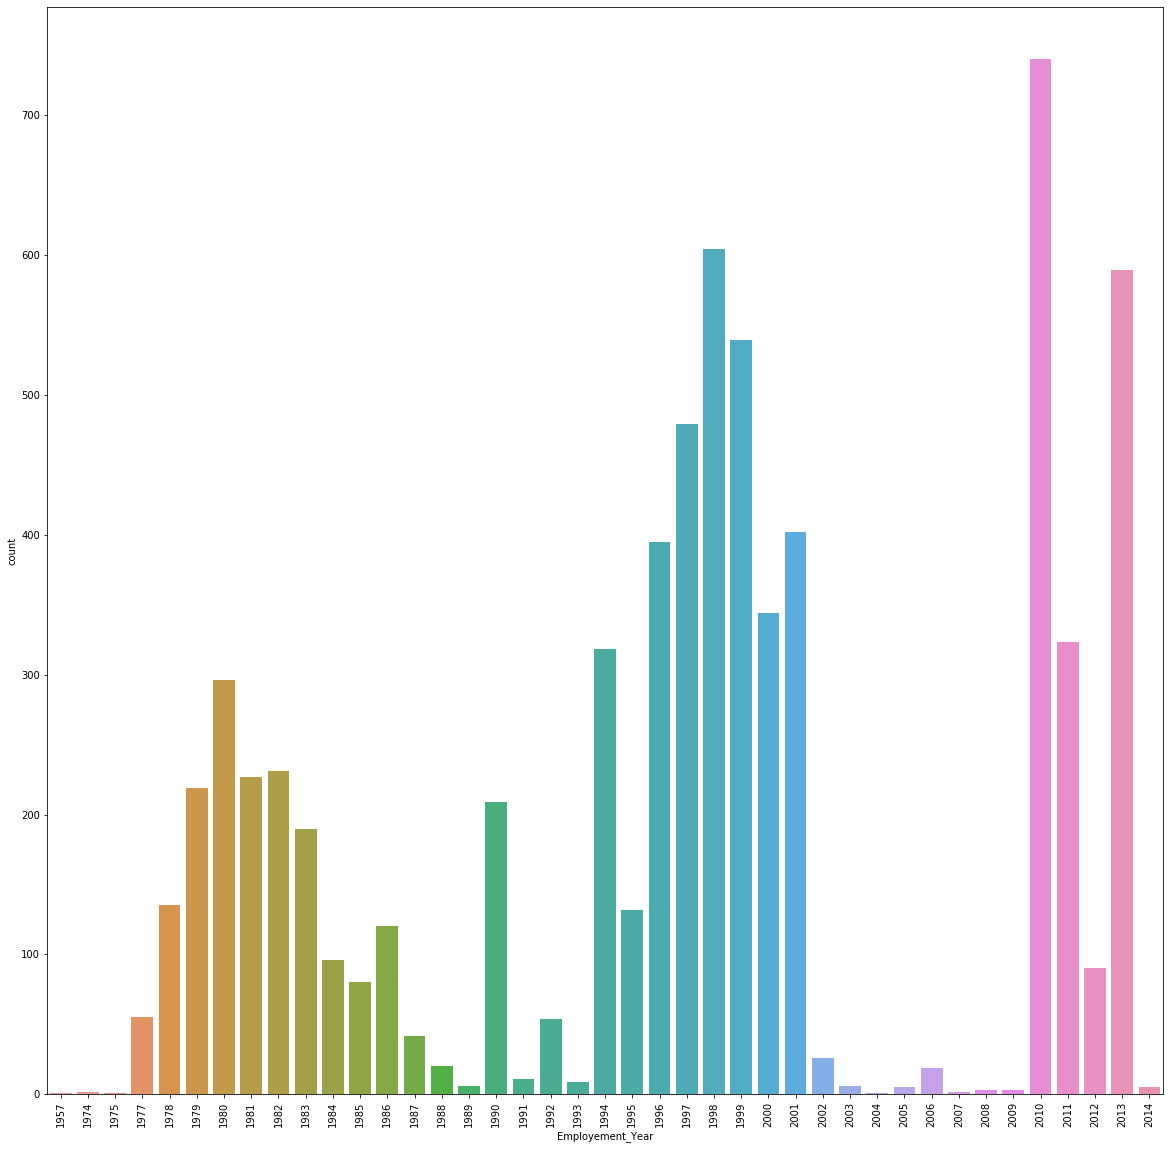

In [93]:
Display_graph_r('Employement_Year', new_list) 

In [94]:
new_list.corr()

,StateOfOrigin,GradeLevel,Step,Age,YearsInService,Years_Remaining,RetirementYear,Employement_Year
StateOfOrigin,1.000000,0.047969,0.069555,-0.026253,-0.057249,0.052395,0.052395,0.057249
GradeLevel,0.047969,1.000000,0.543516,0.087734,0.089686,-0.082769,-0.082769,-0.089686
Step,0.069555,0.543516,1.000000,0.199588,0.223525,-0.221336,-0.221336,-0.223525
Age,-0.026253,0.087734,0.199588,1.000000,0.787772,-0.890093,-0.890093,-0.787772
YearsInService,-0.057249,0.089686,0.223525,0.787772,1.000000,-0.933212,-0.933212,-1.000000
Years_Remaining,0.052395,-0.082769,-0.221336,-0.890093,-0.933212,1.000000,1.000000,0.933212
RetirementYear,0.052395,-0.082769,-0.221336,-0.890093,-0.933212,1.000000,1.000000,0.933212
Employement_Year,0.057249,-0.089686,-0.223525,-0.787772,-1.000000,0.933212,0.933212,1.000000


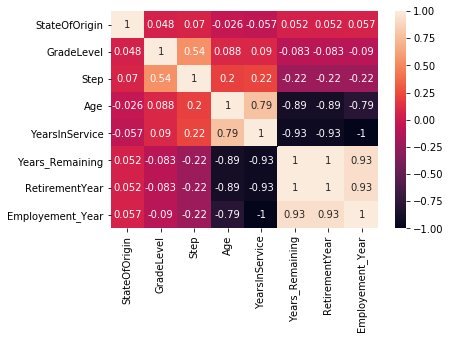

In [96]:


corrMatrix = new_list.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()



In [101]:
new_list

,DepartmentName,StateName,LGAName,Sex,DateOfBirth,DateEmployed,Districts,Location,MaritalStatus,StateOfOrigin,ZoneName,GradeLevel,Category,Step,Age,YearsInService,Years_Remaining,RetirementYear,Employement_Year
0,Civil Engineering / New Lines,Abia,Arochukwu,Male,1960-12-31,1981-03-02,Headquarters,LAGOS,Married,1,South-East,12.0,Permanent,6.0,60.0,39,0,2020,1981
1,Civil Engineering / New Lines,Abia,Arochukwu,0,1976-06-06,2012-09-03,Lagos,,0,1,South-East,0.0,0,0.0,44.0,8,21,2041,2012
2,Civil Engineering / New Lines,Abia,Arochukwu,Male,1985-10-16,2012-07-18,Lagos,ebj,Single,1,South-East,0.0,Permanent,0.0,35.0,8,27,2047,2012
3,Civil Engineering / New Lines,Abia,Arochukwu,0,1969-01-04,1992-04-16,Eastern,,Married,1,South-East,0.0,Permanent,0.0,51.0,28,7,2027,1992
4,Civil Engineering / New Lines,Abia,Arochukwu,Male,1953-12-10,1979-05-03,Eastern,,Married,1,South-East,0.0,Permanent,0.0,67.0,41,0,2020,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9022,Operations & Commercial,Yobe,Potiskum,Male,1983-08-21,2010-08-02,North Eastern,,0,36,North-East,6.0,Permanent,2.0,37.0,10,25,2045,2010
9023,Operations & Commercial,Yobe,Potiskum,Male,1985-01-11,2010-08-02,North Eastern,,Single,36,North-East,0.0,Permanent,0.0,35.0,10,25,2045,2010
9031,Operations & Commercial,Zamfara,Bungudu,Male,1976-05-10,1998-08-17,Northern,,Married,37,North-West,6.0,Permanent,9.0,44.0,22,13,2033,1998
9032,Operations & Commercial,Zamfara,Bungudu,Male,1977-12-20,1998-08-17,Northern,,Married,37,North-West,0.0,Permanent,0.0,43.0,22,13,2033,1998


10    740
22    604
7     589
21    539
23    479
19    402
24    395
20    344
9     323
26    318
40    296
38    231
39    227
41    219
30    209
37    190
42    135
25    132
34    120
36     96
8      90
35     80
43     55
28     54
33     42
18     26
32     20
14     19
29     11
27      9
17      6
31      6
6       5
15      5
12      3
11      3
13      2
46      2
45      1
16      1
63      1
Name: YearsInService, dtype: int64


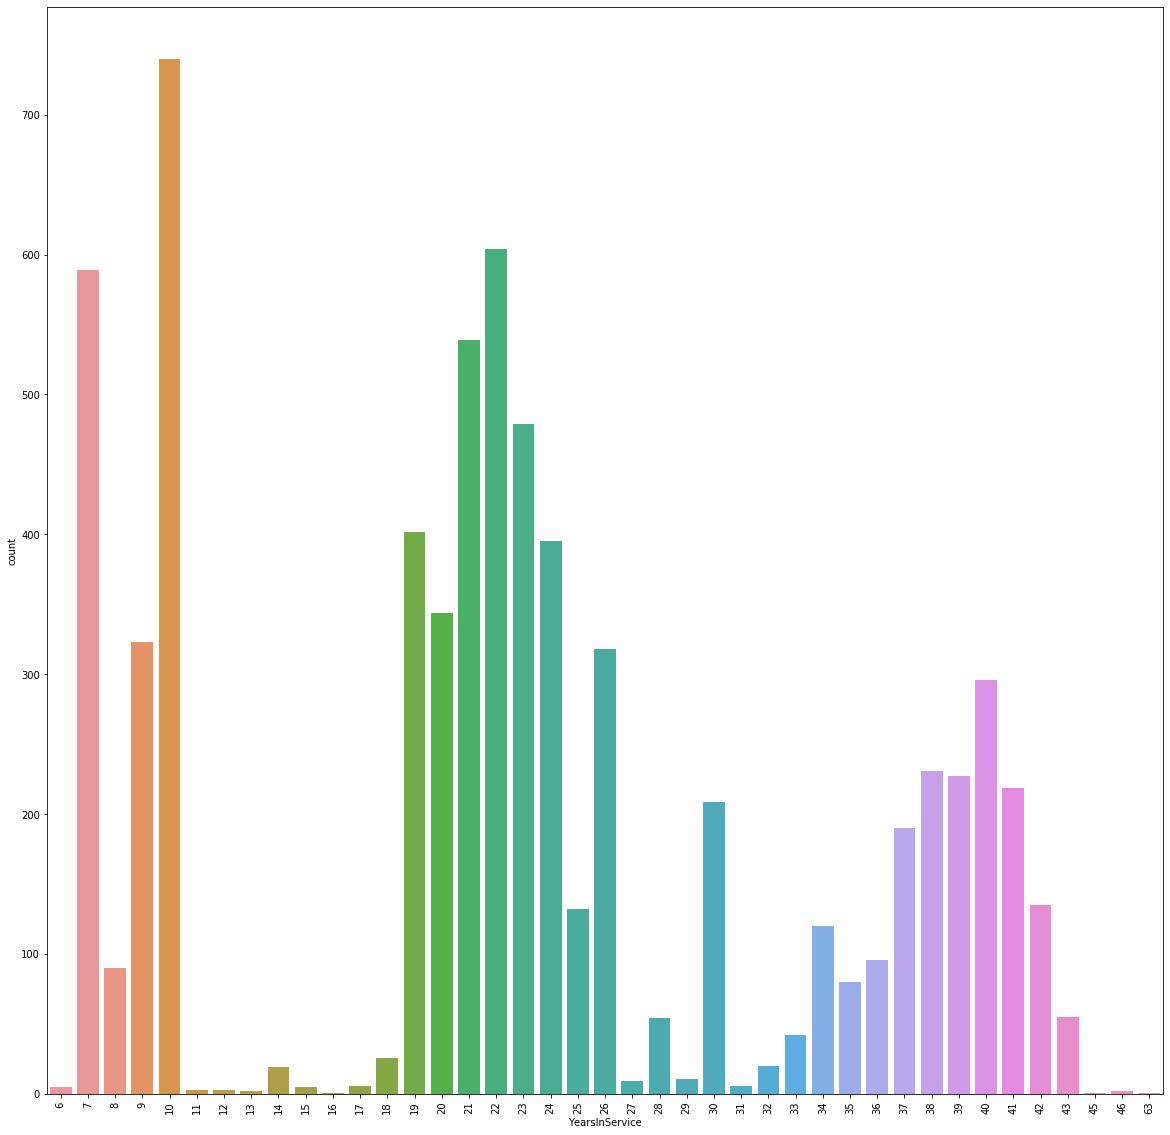

In [124]:

Display_graph_r('YearsInService', new_list) 

In [108]:
new_list.groupby(["Years_Remaining", "YearsInService"])["RetirementYear"].count()

Years_Remaining  YearsInService
0                10                  1
                 18                  1
                 19                  2
                 20                  1
                 21                  9
                                  ... 
26               9                 162
27               7                  44
                 8                  54
28               6                   1
                 7                 334
Name: RetirementYear, Length: 257, dtype: int64

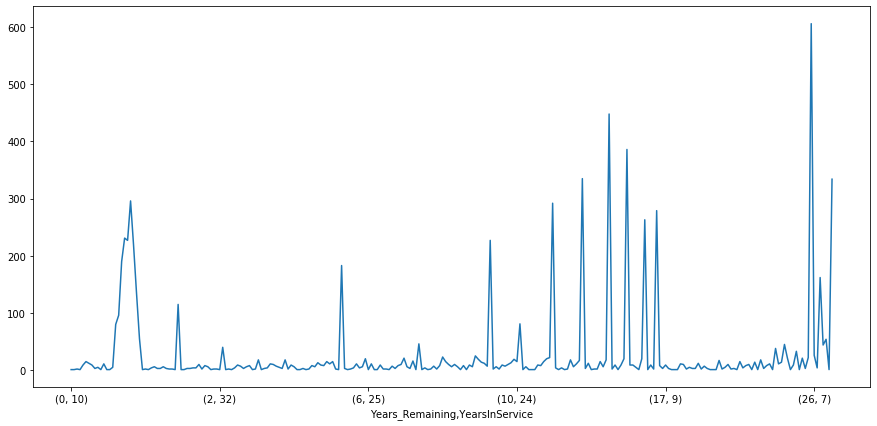

In [113]:
# Retirement based on years of service and dateof birth
#plt.plot(new_list.groupby(["Years_Remaining", "YearsInService"])["RetirementYear"].count())
#plt.plot(new_list['Years_Remaining'].value_counts())
#new_list.groupby(["Years_Remaining", "YearsInService"])["RetirementYear"].count(), kind="line")

fig, ax = plt.subplots(figsize=(15,7))
new_list.groupby(['Years_Remaining','YearsInService']).count()['RetirementYear'].plot(ax=ax)

plt.show()

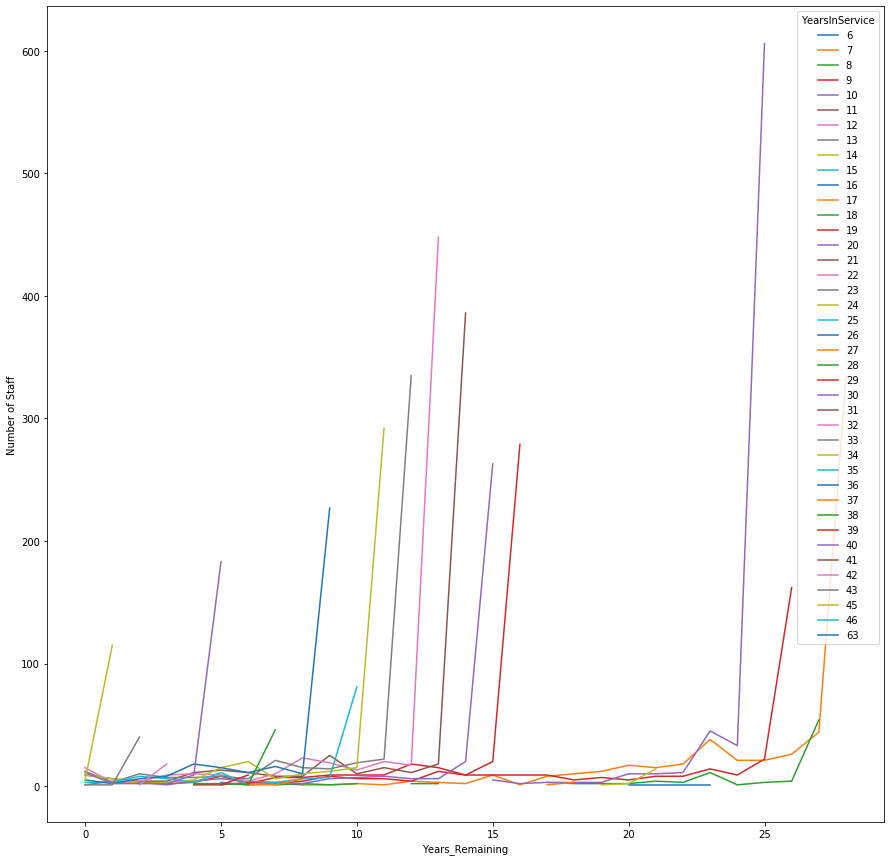

In [121]:
fig, ax = plt.subplots(figsize=(15,15))
new_list.groupby(['Years_Remaining','YearsInService']).count()['RetirementYear'].unstack().plot(ax=ax)
ax.set_ylabel('Number of Staff')
plt.show()

In [30]:
def year_between(dob):
    dobnew = tuple(map(int, dob.split('-')))
    age = relativedelta(date.today(), date(*dobnew))
    return age.years

In [31]:
AgeTest('1998-08-17')

#d1 = '1998-08-17'
#relativedelta(date.today(), date(*d1))

NameError: name 'AgeTest' is not defined

In [ ]:
new_list['Age'] = AgeTest(new_list['DateOfBirth'])

In [ ]:





newDf = year_between(new_list,'DateOfBirth', 'Age')

In [ ]:
newDf